In [1]:
#Cargar las librerias a utilizar
import pandas as pd
import numpy as np

In [2]:
# Leer el Dataframe
bookingsdf = pd.read_csv(r'C:\Users\flore\OneDrive\Documents\Proyecto Final Clonado\ProyectoIntegradorDAFT08\Data\Data Original\bookings.csv')


In [3]:
# Mostrar los tipos de datos de las columnas
print("Tipos de datos para la tabla 'bookingsdf':")
print(bookingsdf.dtypes)

Tipos de datos para la tabla 'bookingsdf':
book_ref        object
book_date       object
total_amount     int64
dtype: object


In [4]:
# Mostrar shape
np.shape(bookingsdf)


(262788, 3)

In [5]:
bookingsdf.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [6]:
# Convertir la columna 'book_date' a tipo datetime
bookingsdf['book_date'] = pd.to_datetime(bookingsdf['book_date'])
bookingsdf.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03:00,265700
1,000012,2017-07-14 09:02:00+03:00,37900
2,000068,2017-08-15 14:27:00+03:00,18100
3,000181,2017-08-10 13:28:00+03:00,131800
4,0002D8,2017-08-07 21:40:00+03:00,23600


In [7]:
# Mostrar los tipos de datos de las columnas
print("Tipos de datos para la tabla 'book_date':")
print(bookingsdf.dtypes)

Tipos de datos para la tabla 'book_date':
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object


In [8]:
# Eliminar filas donde todas las columnas son nulas
bookingsdf = bookingsdf.dropna(how='all')
# Eliminar columnas donde todas las filas son nulas
bookingsdf = bookingsdf.dropna(axis=1, how='all')

In [9]:
# Comprobar valores nulos
print(bookingsdf.isnull().sum())

book_ref        0
book_date       0
total_amount    0
dtype: int64


In [10]:
# Configurar pandas para mostrar los números con formato legible
pd.options.display.float_format = '{:,.2f}'.format

# Ver las estadísticas descriptivas formateadas
print(bookingsdf['total_amount'].describe())

count     262,788.00
mean       79,025.61
std        77,621.92
min         3,400.00
25%        29,000.00
50%        55,900.00
75%        99,200.00
max     1,204,500.00
Name: total_amount, dtype: float64


La gran diferencia entre la media (79,025) y la mediana (55,900) podría indicar valores atípicos altos 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

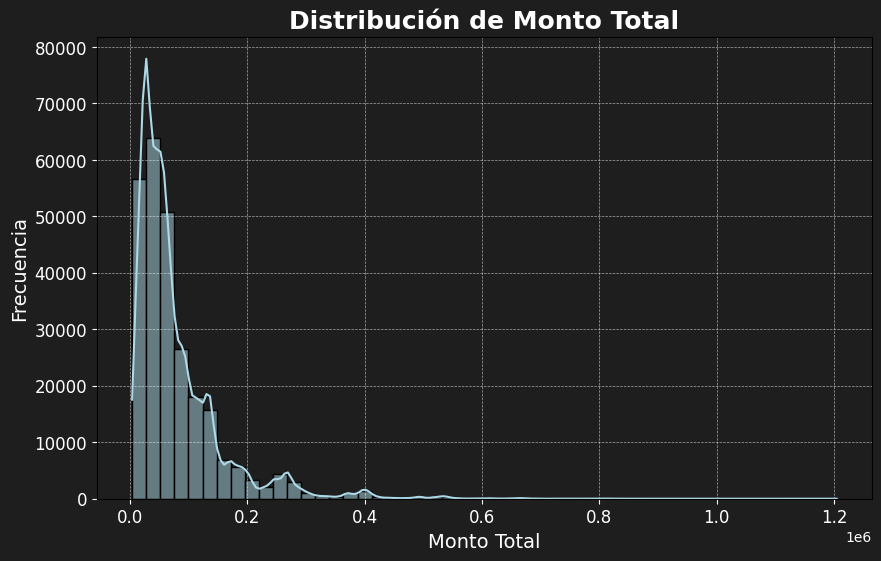

In [12]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(bookingsdf['total_amount'], kde=True, bins=50, color='lightblue')

# Personalizar el fondo
plt.gca().set_facecolor('#1e1e1e')  # Fondo del gráfico en un azul muy oscuro (casi negro)
plt.gcf().set_facecolor('#1e1e1e')  # Fondo de la figura también azul muy oscuro

# Personalizar el título y las etiquetas
plt.title('Distribución de Monto Total', fontsize=18, color='white', weight='bold')
plt.xlabel('Monto Total', fontsize=14, color='white')
plt.ylabel('Frecuencia', fontsize=14, color='white')

# Cambiar el color de los ticks y las etiquetas del eje
plt.tick_params(axis='both', colors='white', labelsize=12)

# Personalizar la cuadrícula (si la deseas visible)
plt.grid(True, linestyle='--', linewidth=0.5, color='white', alpha=0.6)

# Mostrar el gráfico
plt.show()


La mayoría de los montos totales son relativamente bajos, pero hay una cantidad menor de transacciones con valores mucho más altos. Esto sugiere la presencia de algunos valores atípicos que podrían estar influyendo en la media.

In [12]:
# Configurar pandas para mostrar los números con formato legible
pd.options.display.float_format = '{:,.2f}'.format

# Ver las estadísticas descriptivas formateadas
print(bookingsdf['total_amount'].describe())

count     262,788.00
mean       79,025.61
std        77,621.92
min         3,400.00
25%        29,000.00
50%        55,900.00
75%        99,200.00
max     1,204,500.00
Name: total_amount, dtype: float64


book_ref: Es un identificador único para cada reserva o transacción.

book_date: La fecha y hora en que se realizó la reserva, incluyendo la zona horaria (+03:00 sugiere una zona horaria como la de Moscú).


total_amount: El monto total de la transacción, es decir, el costo total del vuelo.


In [13]:
bookingsdf.to_csv("bookingsdf_data_clean.csv", index=False)
